<a href="https://colab.research.google.com/github/vivek16pawar/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import plotly.express as px
from datetime import datetime
import datetime as dt

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')

import math
from math import log1p, sqrt 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


In [ ]:
# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the csv file
df = pd.read_excel('/content/drive/MyDrive/Module 4/Customers Segmentation/Online Retail.xlsx')

In [ ]:
# Overview of dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Overview of dataframe
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Summary of dataframe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning

In [ ]:
# Checking number of rows and column in dataset
df.shape

(541909, 8)

In [ ]:
# Checking for duplicates
df.drop_duplicates(inplace = True)

In [ ]:
# After dropping hte duplicate values check the shape of dataset
df.shape

(536641, 8)

In [ ]:
# Checking for null values on different columns
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
# Dropping null values as we cannot impute customer_id and description
df.dropna(inplace = True)

In [ ]:
# Shape of dataset after dropping null value
df.shape

(401604, 8)

In [ ]:
# Changing datatype pf invoice no to str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
# Checking percentage of cancelled invoice
df["Cancelled_trans"]=np.where(df.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
df.Cancelled_trans.value_counts() / df.shape[0] * 100

False    97.790859
True      2.209141
Name: Cancelled_trans, dtype: float64

In [ ]:
# Keeping column where there is no cancelled invoice
df = df.loc[df.Cancelled_trans == False].copy()
df = df.drop('Cancelled_trans',axis = 1)

In [ ]:
# Overview of dataframe
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Summerizing data
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
# Creating new column amount spent
df['Amount_spent'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Summerizing data of amount spent
df.Amount_spent.describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: Amount_spent, dtype: float64

In [ ]:
# Extracting year,month,day,hour,minutes,day_of_week from Invoice date column
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Hour']=df['InvoiceDate'].dt.hour
df['Minutes']=df['InvoiceDate'].dt.minute
df['Day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [ ]:
# Marking the day with number
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df['Day_of_week'] = df['Day_of_week'].apply(lambda x: days[x])

In [ ]:
# Overview of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,26,Weds
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,26,Weds
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds


In [ ]:
# Grouping by on customerid,invoice no and getting amount price as basket price
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['Amount_spent'].sum()
basket_price = temp.rename(columns = {'Amount_spent':'Basket Price'})

In [ ]:
# Overview of backetprice
basket_price

,CustomerID,InvoiceNo,Basket Price
0,12346.0,541431,77183.60
1,12347.0,537626,711.79
2,12347.0,542237,475.39
3,12347.0,549222,636.25
4,12347.0,556201,382.52
...,...,...,...
18531,18283.0,579673,220.31
18532,18283.0,580872,208.00
18533,18287.0,554065,765.28
18534,18287.0,570715,1001.32


In [ ]:
# Overview of dataframe
df.head()

## Exploratory Data Analysis

In [ ]:
# Checking total product, transaction,customers
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18536,4339


In [ ]:
# Number of cuntries in dataset
df.Country.nunique()

37

In [ ]:
# Plotting country vs transaction
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(20,5))
px.bar(country_counts ,x = country_counts.index, y = country_counts.values,log_y=True,
       labels={
                     "y": "Transactions",
                     "index": "Countries",
                 },
       title="Which countries made the most transactions?");

<Figure size 1440x360 with 0 Axes>

In [ ]:
# Create feature which indicates inside or outside UK
df["UK"] = np.where(df.Country == "United Kingdom", 1, 0)

In [ ]:
# Overview of dataframe
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week,UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,26,Weds,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds,1


Text(0.5, 1.0, 'Yearly Transactions Count')

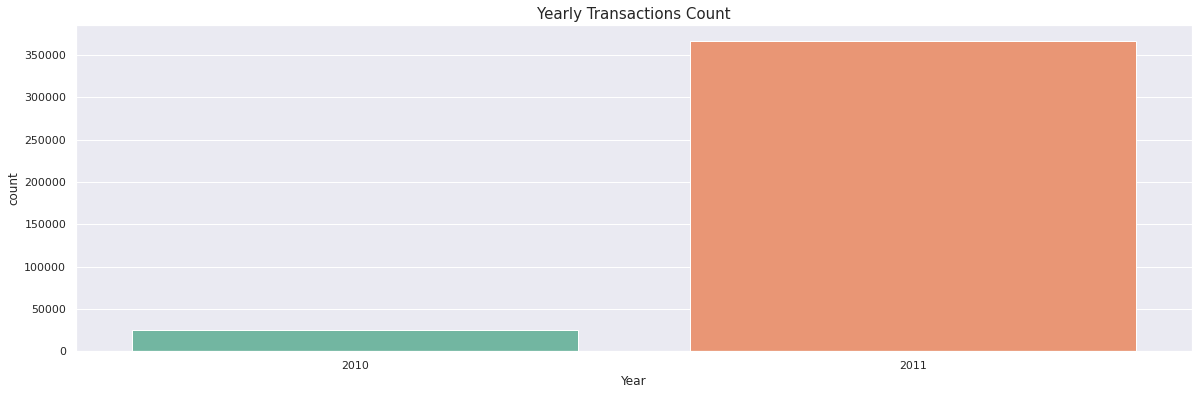

In [ ]:
# plotting year count
plt.figure(figsize = (20,6))
sns.set_style('darkgrid')
sns.countplot(df.Year,palette='Set2')
plt.title('Yearly Transactions Count',fontsize=15)

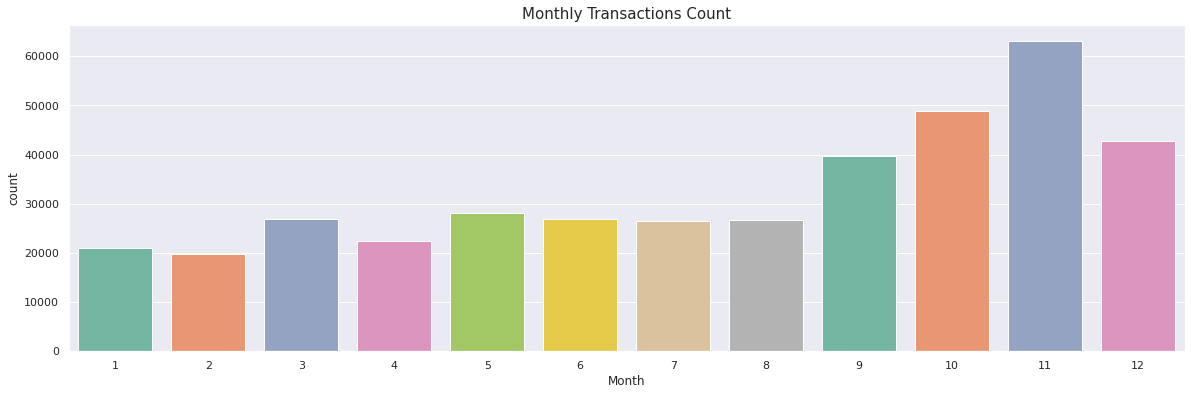

In [ ]:
# Plotting Monthly Transactions Count
plt.figure(figsize = (20,6))
sns.countplot(df.Month, palette='Set2')
plt.title('Monthly Transactions Count',fontsize=15);

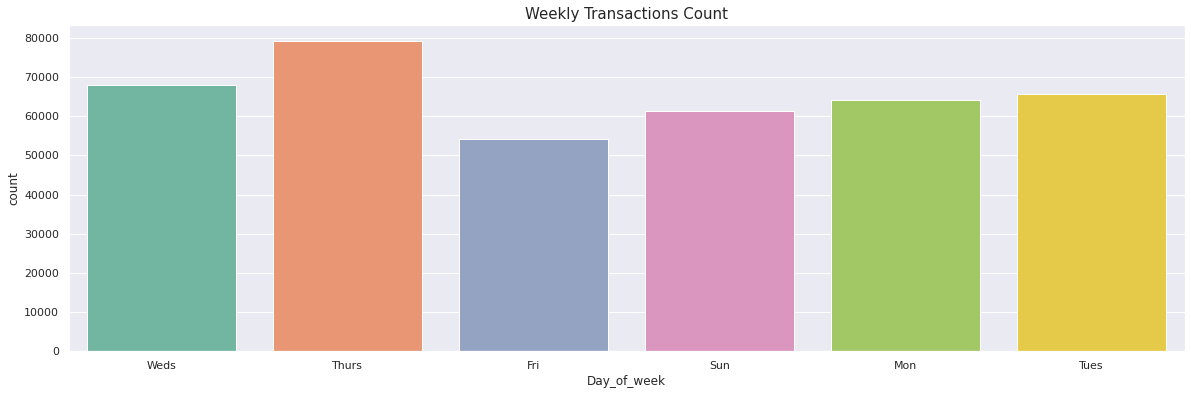

In [ ]:
# Plotting Weekly Transactions Count
plt.figure(figsize = (20,6))
sns.countplot(df.Day_of_week, palette='Set2')
plt.title('Weekly Transactions Count',fontsize=15);

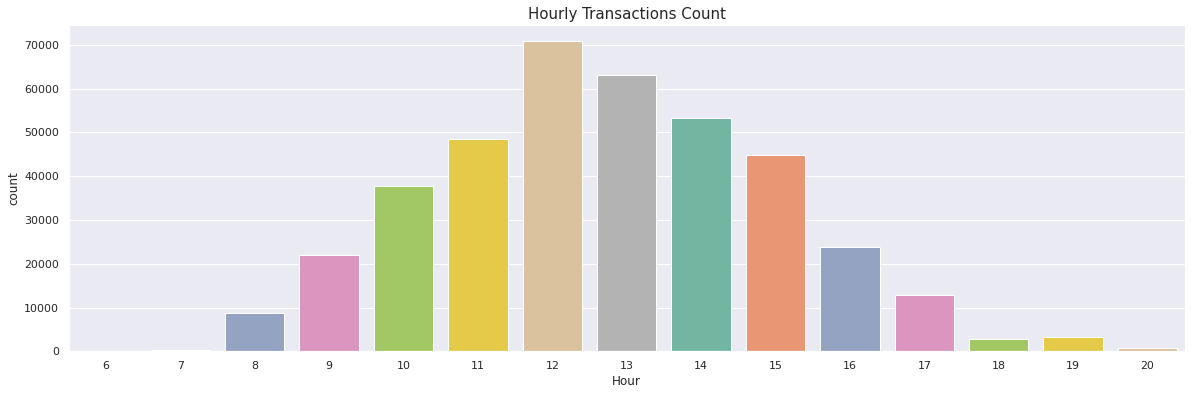

In [ ]:
## Plotting Hourly Transactions Count
plt.figure(figsize = (20,6))
sns.countplot(df.Hour, palette='Set2')
plt.title('Hourly Transactions Count',fontsize=15);

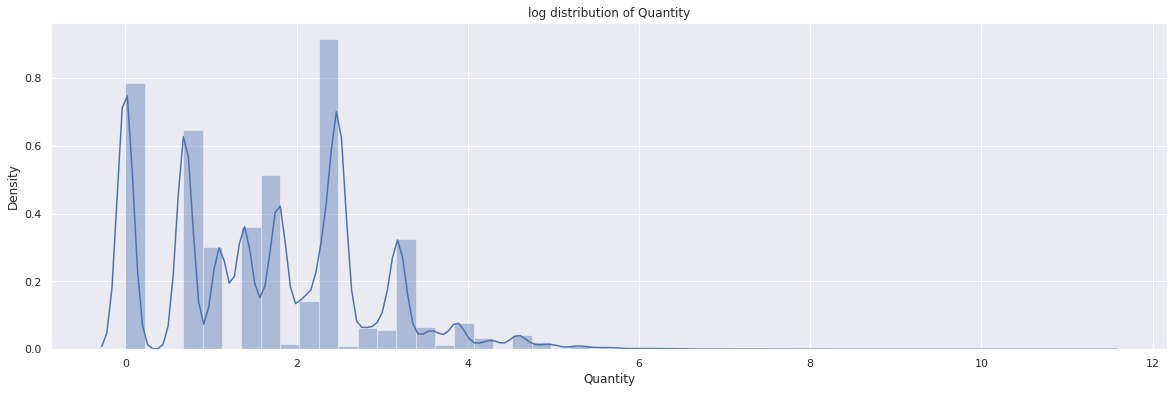

In [ ]:
# Plotting distribution of quantity
plt.figure(figsize=(20,6))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))

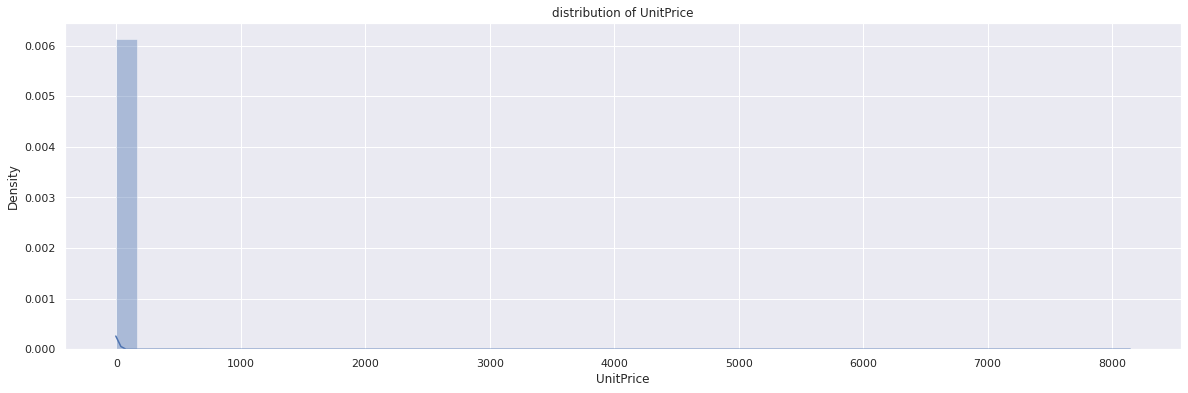

In [ ]:
# Plotting distribution of unitprice
plt.figure(figsize=(20,6))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B");

## Prepare Data

As customer clusters may vary by geography, I’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data.

In [ ]:
# Restricting analysis to UK
retail_uk = df[df['Country']=='United Kingdom']
#check the shape
retail_uk.shape

(349227, 16)

In [ ]:
#restrict the data to one full year because it's better to use a metric per Months or Years in RFM
retail_uk = retail_uk[retail_uk['InvoiceDate']>= "2010-12-09"]
retail_uk.shape

(337670, 16)

In [ ]:
# Checking total product, transaction,customers
pd.DataFrame([{'products': len(retail_uk['StockCode'].value_counts()),    
               'transactions': len(retail_uk['InvoiceNo'].value_counts()),
               'customers': len(retail_uk['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3611,16017,3863


In [ ]:
# Changing datatype to integer
df['CustomerID'] = df['CustomerID'].astype('int64')

## RFM Analysis

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent.

### Recency

In [ ]:
#last date available in our dataset
retail_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

The last date we have is 2011-12-09 so we will use it as reference.

In [ ]:
# Taking last date as reference
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [ ]:
# Creating new coumn containing only date
retail_uk['date'] = pd.DatetimeIndex(retail_uk['InvoiceDate']).date

In [ ]:
# retail overview
retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week,UK,date
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom,47.4,2010,12,9,8,34,Thurs,1,2010-12-09
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243.0,United Kingdom,37.2,2010,12,9,8,34,Thurs,1,2010-12-09
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243.0,United Kingdom,15.3,2010,12,9,8,34,Thurs,1,2010-12-09
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,31.8,2010,12,9,8,34,Thurs,1,2010-12-09
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,15.9,2010,12,9,8,34,Thurs,1,2010-12-09


In [ ]:
# Creating recency dataframe
recency = retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency.columns = ['CustomerID','LastPurshaceDate']
recency.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [ ]:
recency.shape

(3863, 2)

In [ ]:
#calculating recency
recency['Recency'] = recency['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [ ]:
recency.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [ ]:
#droping LastPurchaseDate 
recency.drop('LastPurshaceDate',axis=1,inplace=True)

### Frequency

In [ ]:
#calculate frequency of purchases
frequency = retail_uk.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,96
2,12748.0,4063
3,12749.0,199
4,12820.0,59


### Monetary

In [ ]:
# Amount Spent Columns
retail_uk.Amount_spent

19632      47.4
19633      37.2
19634      15.3
19635      31.8
19636      15.9
          ...  
541889     23.4
541890     23.6
541891     30.0
541892    214.8
541893     70.8
Name: Amount_spent, Length: 337670, dtype: float64

In [ ]:
# Creating Monetary Column
monetary = retail_uk.groupby(by='CustomerID',as_index=False).agg({'Amount_spent': 'sum'})
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,3837.45
2,12748.0,31217.94
3,12749.0,4090.88
4,12820.0,942.34


In [ ]:
#merge recency with frequency 
rf_merge = recency.merge(frequency,on='CustomerID')
rf_merge.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,96
2,12748.0,0,4063
3,12749.0,3,199
4,12820.0,3,59


In [ ]:
#merge with monetary dataframe to get a table with the 3 columns
rfm = rf_merge.merge(monetary,on='CustomerID')

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore
0,12346.0,325,1,77183.60,114,6
1,12747.0,2,96,3837.45,434,11
2,12748.0,0,4063,31217.94,444,12
3,12749.0,3,199,4090.88,444,12
4,12820.0,3,59,942.34,433,10
...,...,...,...,...,...,...
3858,18280.0,277,10,180.60,111,3
3859,18281.0,180,7,80.82,111,3
3860,18282.0,7,12,178.05,411,6
3861,18283.0,3,721,2045.53,444,12


### RFM Quartiles

In [ ]:
# assign a score from 1 to 4 to Recency, Frequency and Monetary
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14200.0,17.0,17.0,293.05
0.50,15561.0,49.0,40.0,639.02
0.75,16911.0,134.0,96.0,1548.75


In [ ]:
# convert to dict
quantiles.to_dict()

{'CustomerID': {0.25: 14200.0, 0.5: 15561.0, 0.75: 16911.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 96.0},
 'Monetary': {0.25: 293.05, 0.5: 639.02, 0.75: 1548.75},
 'Recency': {0.25: 17.0, 0.5: 49.0, 0.75: 134.0}}

### Creation of RFM Segments

In [ ]:
# RScore creation
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
# FM Score creation
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
#create rfm segmentation 
segmentation = rfm

In [ ]:
# Creating Recency Quartile
segmentation['R_Quartile'] = segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))

In [ ]:
# Creating Frequency Quartile
segmentation['F_Quartile'] = segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))

In [ ]:
# Creating Monetary Quartile
segmentation['M_Quartile'] = segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,12346.0,325,1,77183.60,1,1,4
1,12747.0,2,96,3837.45,4,3,4
2,12748.0,0,4063,31217.94,4,4,4
3,12749.0,3,199,4090.88,4,4,4
4,12820.0,3,59,942.34,4,3,3


In [ ]:
segmentation.shape

(3863, 7)

In [ ]:
#  Adding all quartile to create rfm score
segmentation['RFM Group'] = segmentation.R_Quartile.map(str) \
                            + segmentation.F_Quartile.map(str) \
                            + segmentation.M_Quartile.map(str)
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Group
0,12346.0,325,1,77183.60,1,1,4,114
1,12747.0,2,96,3837.45,4,3,4,434
2,12748.0,0,4063,31217.94,4,4,4,444
3,12749.0,3,199,4090.88,4,4,4,444
4,12820.0,3,59,942.34,4,3,3,433


In [ ]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
segmentation['RFMScore'] = segmentation[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis = 1)
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Group,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114,6
1,12747.0,2,96,3837.45,4,3,4,434,11
2,12748.0,0,4063,31217.94,4,4,4,444,12
3,12749.0,3,199,4090.88,4,4,4,444,12
4,12820.0,3,59,942.34,4,3,3,433,10


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

In [ ]:
# Getting our best customers
segmentation[segmentation['RFMScore']== 12].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Group,RFMScore
3729,18102.0,0,414,233736.93,4,4,4,444,12
3272,17450.0,8,333,192361.95,4,4,4,444,12
3314,17511.0,2,920,87591.70,4,4,4,444,12
2731,16684.0,4,277,66653.56,4,4,4,444,12
894,14096.0,4,5111,65164.79,4,4,4,444,12
615,13694.0,3,562,64197.50,4,4,4,444,12
1752,15311.0,0,2282,59296.04,4,4,4,444,12
2087,15769.0,7,129,56160.92,4,4,4,444,12
188,13089.0,2,1773,55531.46,4,4,4,444,12
1034,14298.0,8,1637,51527.30,4,4,4,444,12


In [ ]:
#Printing detail insight
print("Best Customers: ",len(segmentation[segmentation['RFM Group']=='444']))
print('Loyal Customers: ',len(segmentation[segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(segmentation[segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(segmentation[segmentation['RFM Group']=='244']))
print('Lost Customers: ',len(segmentation[segmentation['RFM Group']=='144']))
print('Lost Cheap Customers: ',len(segmentation[segmentation['RFM Group']=='111']))

Best Customers:  404
Loyal Customers:  961
Big Spenders:  966
Almost Lost:  96
Lost Customers:  18
Lost Cheap Customers:  337


In [ ]:
segmentation.drop(['R_Quartile', 'F_Quartile','M_Quartile'], axis=1,inplace = True)

## Model Preparation

Text(0.5, 0, 'Attributes')

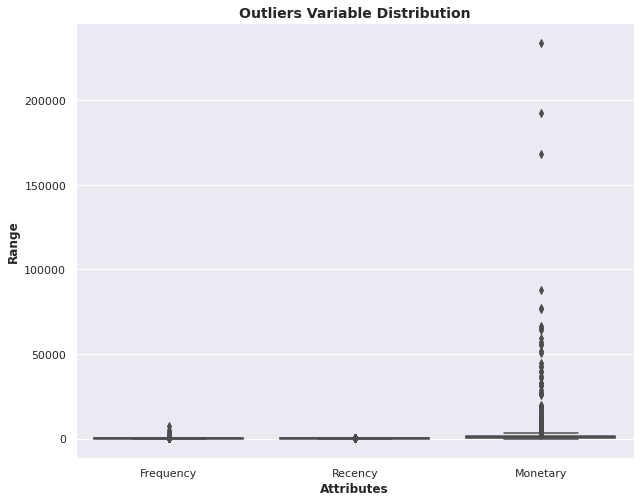

In [ ]:
attributes = ['Frequency', 'Recency', 'Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = segmentation[attributes])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = segmentation['Monetary'].quantile(0.05)
Q3 = segmentation['Monetary'].quantile(0.95)
IQR = Q3 - Q1
segmentation = segmentation[(segmentation['Monetary'] >= Q1 - 1.5*IQR) & (segmentation['Monetary'] <= Q3 + 1.5*IQR)]

Q1 = segmentation['Frequency'].quantile(0.05)
Q3 = segmentation['Frequency'].quantile(0.95)
IQR = Q3 - Q1
segmentation = segmentation[(segmentation['Frequency'] >= Q1 - 1.5*IQR) & (segmentation['Frequency'] <= Q3 + 1.5*IQR)]


Q1 = segmentation['Recency'].quantile(0.05)
Q3 = segmentation['Recency'].quantile(0.95)
IQR = Q3 - Q1
segmentation = segmentation[(segmentation['Recency'] >= Q1 - 1.5*IQR) & (segmentation['Recency'] <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

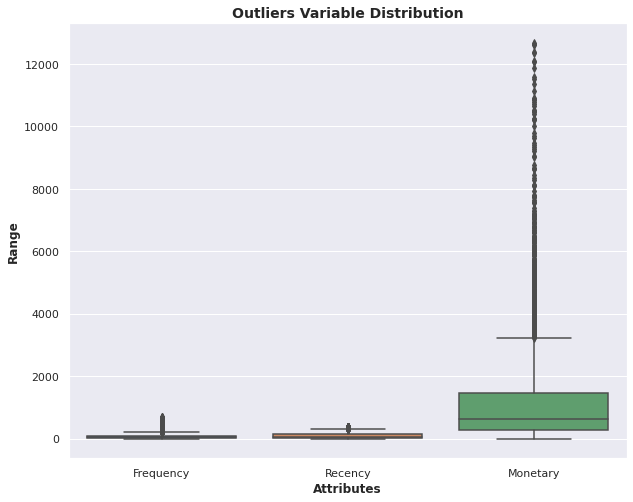

In [ ]:
attributes = ['Frequency', 'Recency', 'Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = segmentation[attributes])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
#Handle negative and zero values
def neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply neg_n_zero function to Recency and Monetary columns 
segmentation['Recency'] = [neg_n_zero(x) for x in segmentation.Recency]
segmentation['Monetary'] = [neg_n_zero(x) for x in segmentation.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = segmentation[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

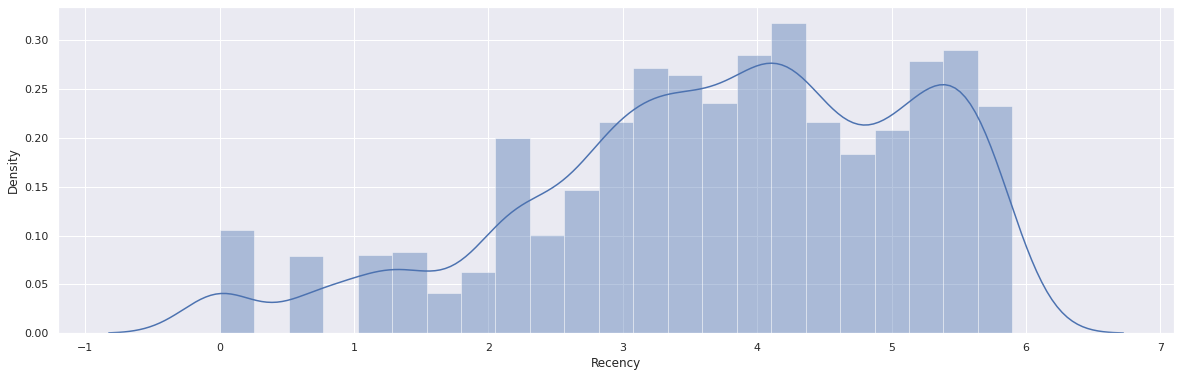

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(20,6))
sns.distplot(Recency_Plot);

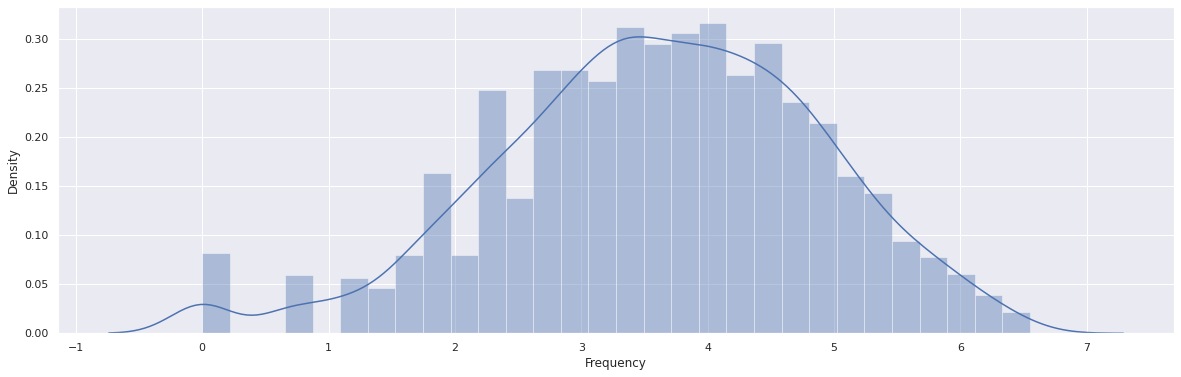

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(20,6))
sns.distplot(Frequency_Plot);

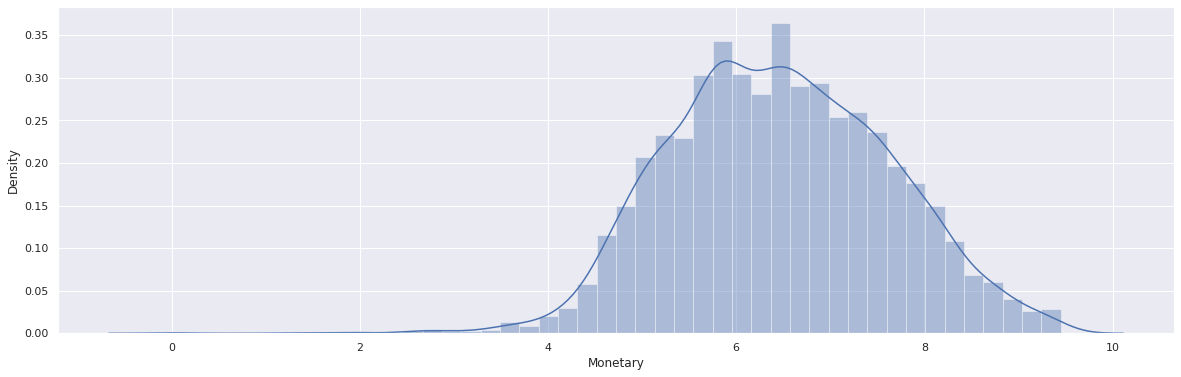

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(20,6))
sns.distplot(Monetary_Plot);

In [ ]:
from sklearn import preprocessing
segmentation['Recency_log'] = segmentation['Recency'].apply(math.log)
segmentation['Frequency_log'] = segmentation['Frequency'].apply(math.log)
segmentation['Monetary_log'] = segmentation['Monetary'].apply(math.log)

## Model

- Applying Silhouette Score Method on Recency and Monetary

In [ ]:
# Scaling input data 
features_rm=['Recency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

In [ ]:
# Appling K means Algorithm and checking its silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=50)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4171653353913864
For n_clusters = 3, silhouette score is 0.34623044894100935
For n_clusters = 4, silhouette score is 0.3644004523269575
For n_clusters = 5, silhouette score is 0.3420033163089056
For n_clusters = 6, silhouette score is 0.346618127992717
For n_clusters = 7, silhouette score is 0.34636327708443015
For n_clusters = 8, silhouette score is 0.34325370483274187
For n_clusters = 9, silhouette score is 0.3515350332635213
For n_clusters = 10, silhouette score is 0.33993229113813545
For n_clusters = 11, silhouette score is 0.34709539679052537
For n_clusters = 12, silhouette score is 0.3480368138685078
For n_clusters = 13, silhouette score is 0.3488398475134799
For n_clusters = 14, silhouette score is 0.34403518482067447
For n_clusters = 15, silhouette score is 0.3402388760155355


- Applying Elbow Method on Recency and Monetary

In [ ]:
# Scaling input data for silhouette score
features_rm=['Recency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

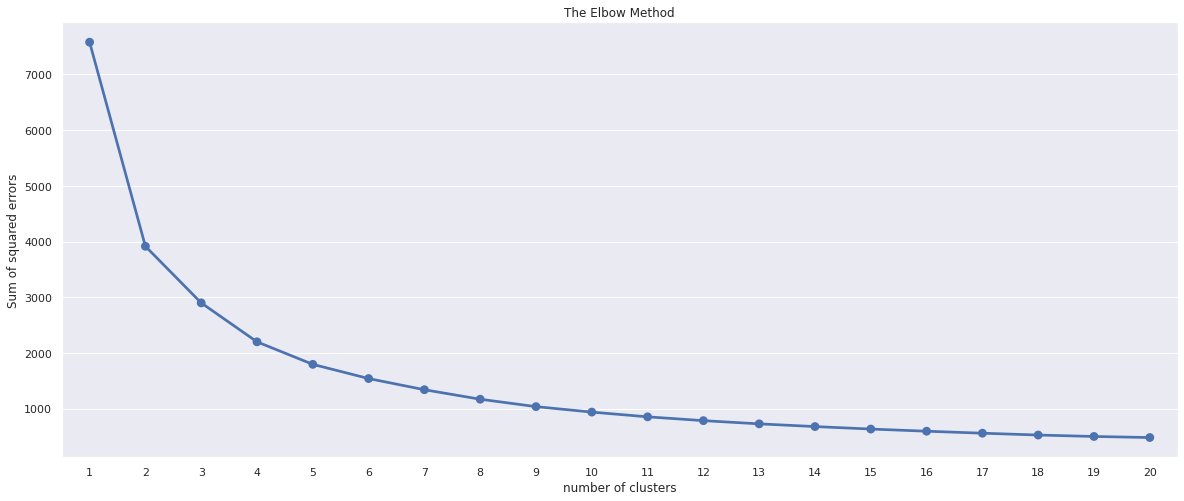

In [ ]:
# Elbow-curve/SSD
wcss = {}
# Fit KMeans and calculate SSE for each k
for k in range(1,21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=50)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(X)
    
    # Assign sum of squared distances to k element of dictionary
    wcss[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(20,8))
plt.title('The Elbow Method')
plt.xlabel('number of clusters'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [ ]:
# Using number of cluster as 2 for customer segmentation
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

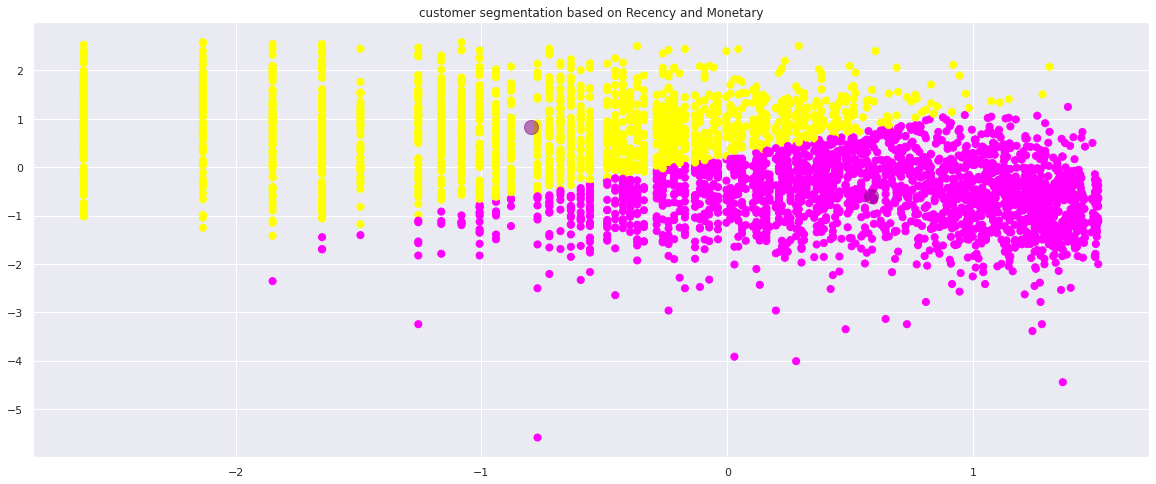

In [ ]:
# Plotting the cluster scatter plot
plt.figure(figsize=(20,8))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

- Applying Silhouette Score Method on Frequency and Monetary

In [ ]:
# Scaling input data 
features_rm=['Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

In [ ]:
# Appling K means Algorithm and checking its silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=50)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4816425935736115
For n_clusters = 3, silhouette score is 0.40953917052513766
For n_clusters = 4, silhouette score is 0.37072517532170535
For n_clusters = 5, silhouette score is 0.3347777329596198
For n_clusters = 6, silhouette score is 0.3548008701631538
For n_clusters = 7, silhouette score is 0.3403890981271719
For n_clusters = 8, silhouette score is 0.34983292016470563
For n_clusters = 9, silhouette score is 0.3605574461383412
For n_clusters = 10, silhouette score is 0.34935464066938926
For n_clusters = 11, silhouette score is 0.3590745056422858
For n_clusters = 12, silhouette score is 0.36699396758070546
For n_clusters = 13, silhouette score is 0.35403683691515575
For n_clusters = 14, silhouette score is 0.35489747860748455
For n_clusters = 15, silhouette score is 0.36333150951549714


- Applying Elbow Method on Frequency and Monetary

In [ ]:
# Scaling input data for silhouette score
features_rm=['Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

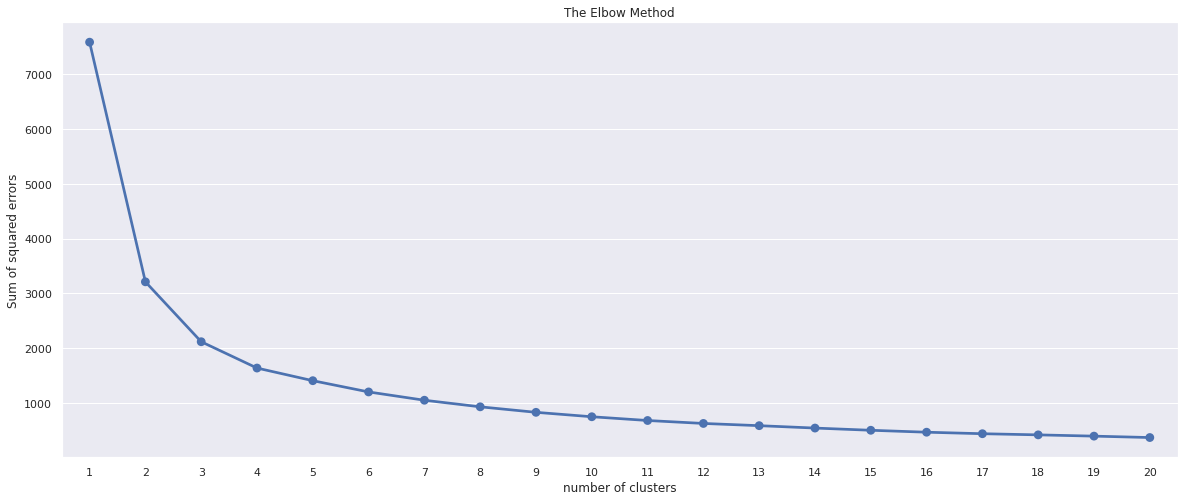

In [ ]:
# Elbow-curve/SSD
wcss = {}
# Fit KMeans and calculate SSE for each k
for k in range(1,21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=50)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(X)
    
    # Assign sum of squared distances to k element of dictionary
    wcss[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(20,8))
plt.title('The Elbow Method')
plt.xlabel('number of clusters'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [ ]:
# Using number of cluster as 2 for customer segmentation
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

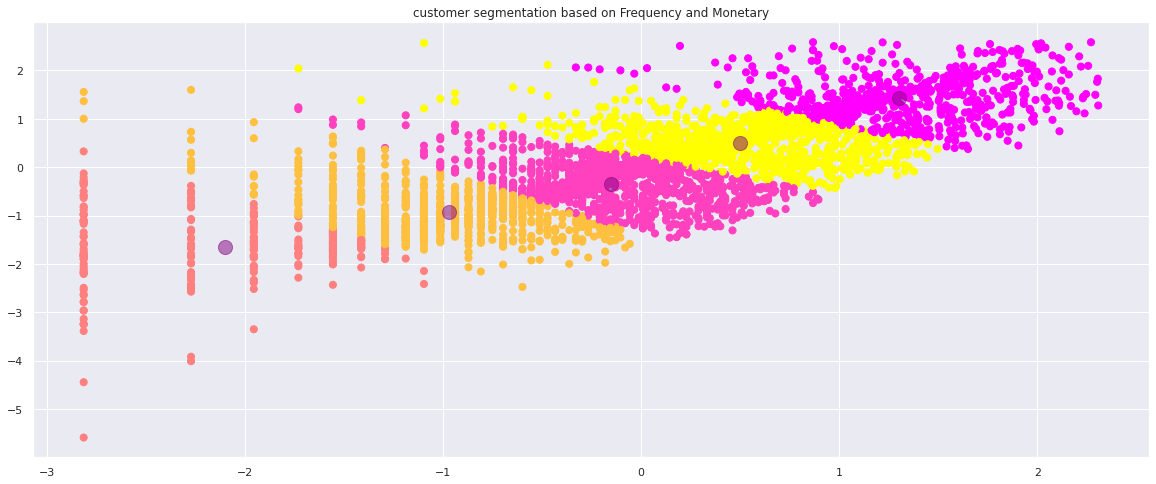

In [ ]:
# Plotting the cluster scatter plot
plt.figure(figsize=(20,8))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

- Applying silhouette score method on Recency, Frequency and Monetary

In [ ]:
# Scaling input data for silhouette score
features_rm=['Recency_log','Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

In [ ]:
# Appling K means Algorithm and checking its silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=50)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3928586024722705
For n_clusters = 3, silhouette score is 0.2928507899932536
For n_clusters = 4, silhouette score is 0.29604631840231294
For n_clusters = 5, silhouette score is 0.28137766390459795
For n_clusters = 6, silhouette score is 0.2584972733159905
For n_clusters = 7, silhouette score is 0.2642299323645509
For n_clusters = 8, silhouette score is 0.27038246767945273
For n_clusters = 9, silhouette score is 0.25415818306070836
For n_clusters = 10, silhouette score is 0.27645356019107364
For n_clusters = 11, silhouette score is 0.26842622761161716
For n_clusters = 12, silhouette score is 0.26396222192349883
For n_clusters = 13, silhouette score is 0.2631325275801006
For n_clusters = 14, silhouette score is 0.2543816700214363
For n_clusters = 15, silhouette score is 0.2578741383252817


For n_clusters = 2 The average silhouette_score is : 0.3928848467593723
For n_clusters = 3 The average silhouette_score is : 0.29294987109092346
For n_clusters = 4 The average silhouette_score is : 0.2958789311793881
For n_clusters = 5 The average silhouette_score is : 0.281413537214285
For n_clusters = 6 The average silhouette_score is : 0.258489444757559
For n_clusters = 7 The average silhouette_score is : 0.265484321239893
For n_clusters = 8 The average silhouette_score is : 0.2692638545049555
For n_clusters = 9 The average silhouette_score is : 0.27786097838102575
For n_clusters = 10 The average silhouette_score is : 0.27631647667453824


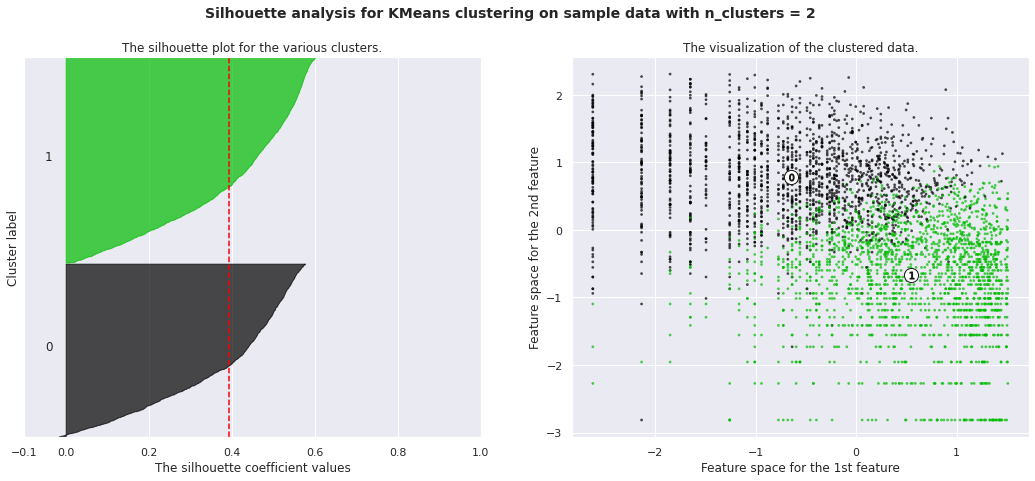

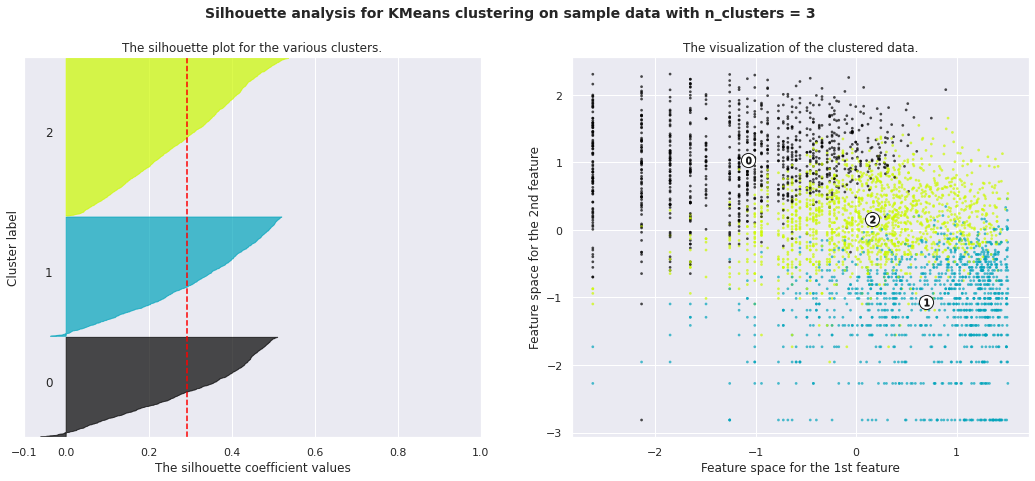

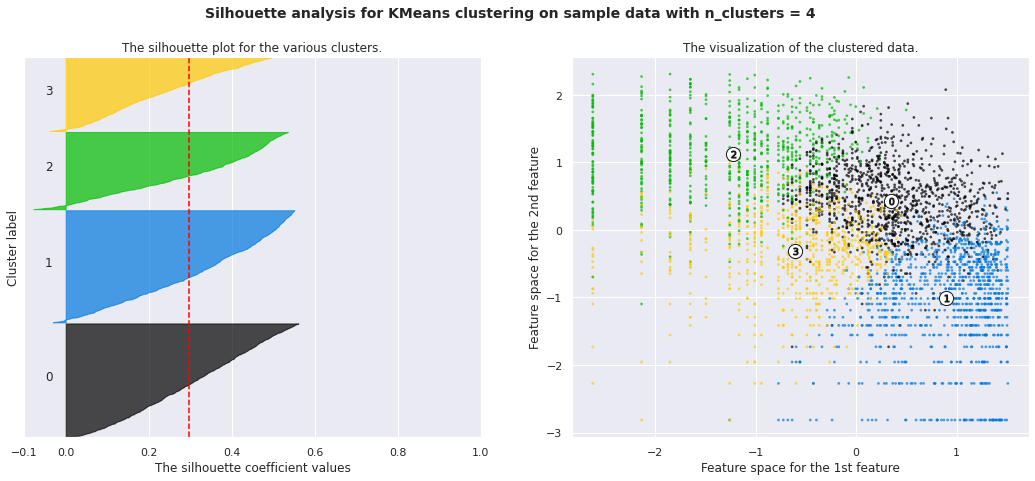

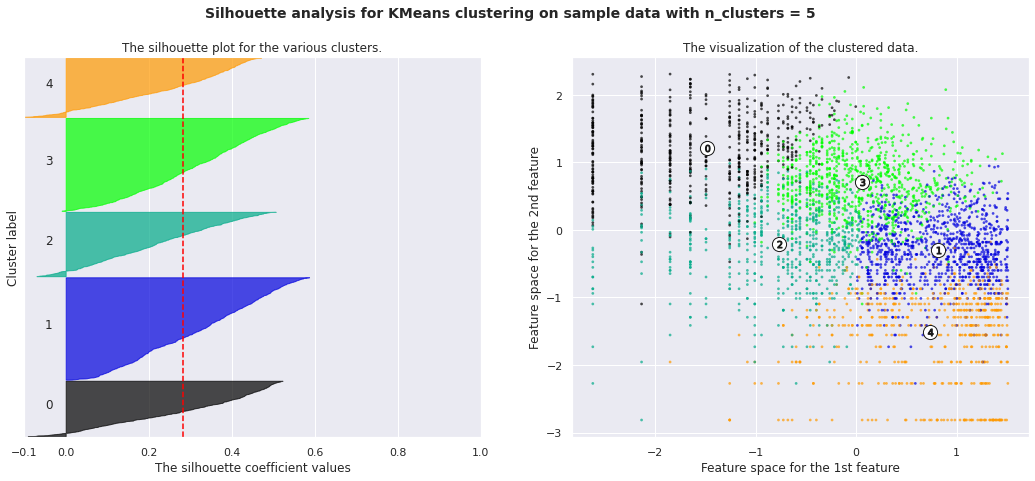

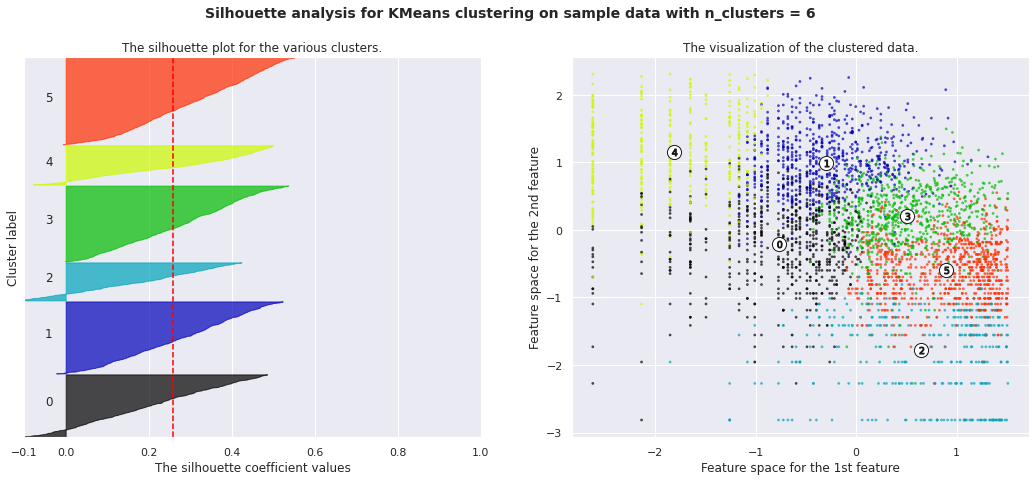

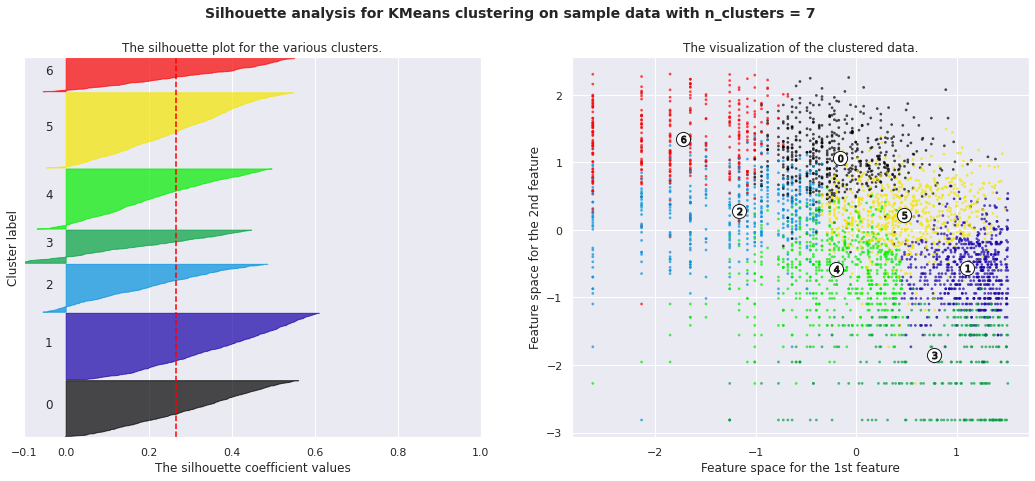

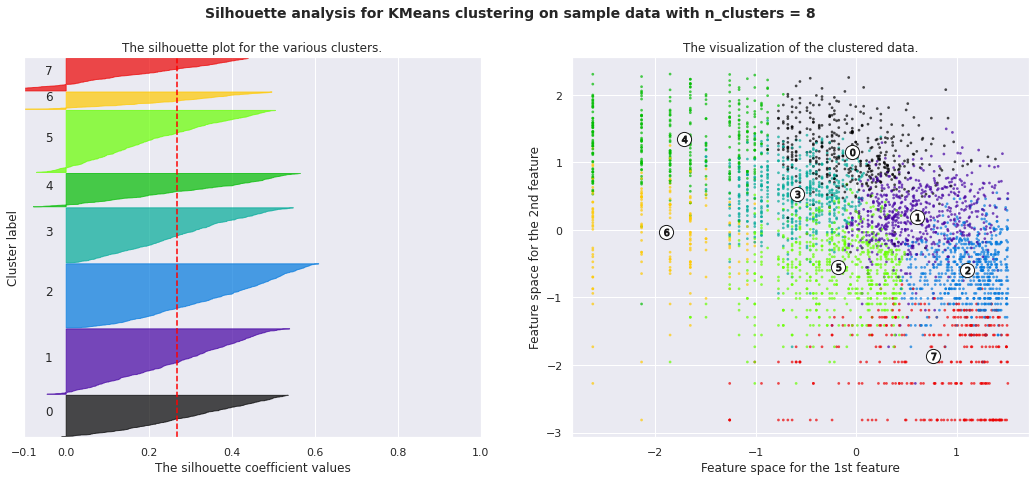

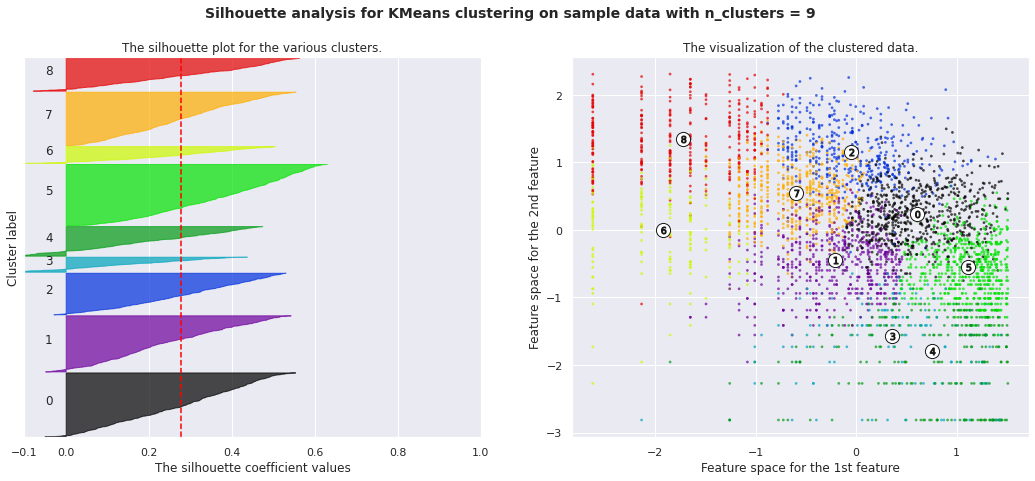

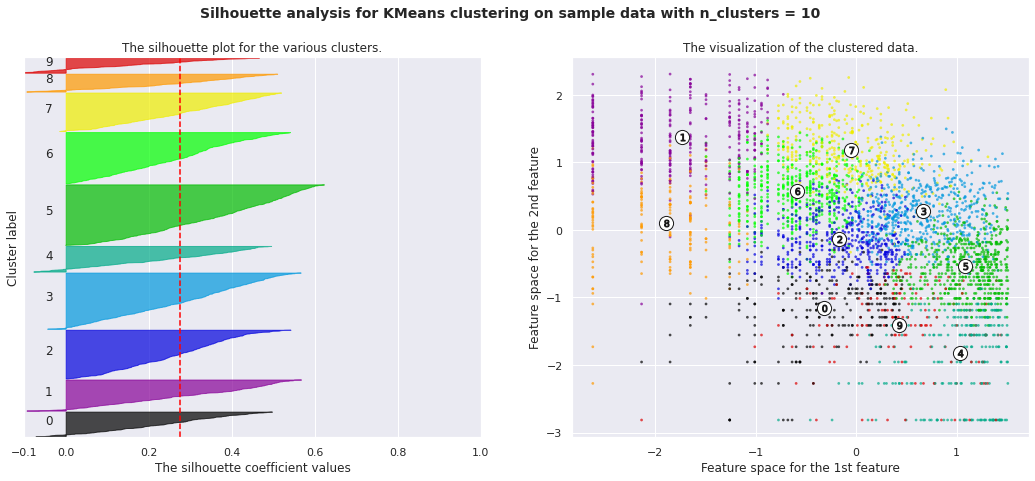

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10,max_iter = 50)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

- Applying Elbow method on Recency, Frequency and Monetary

In [ ]:
# Scaling input data for Elbow Method
features_rm=['Recency_log','Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

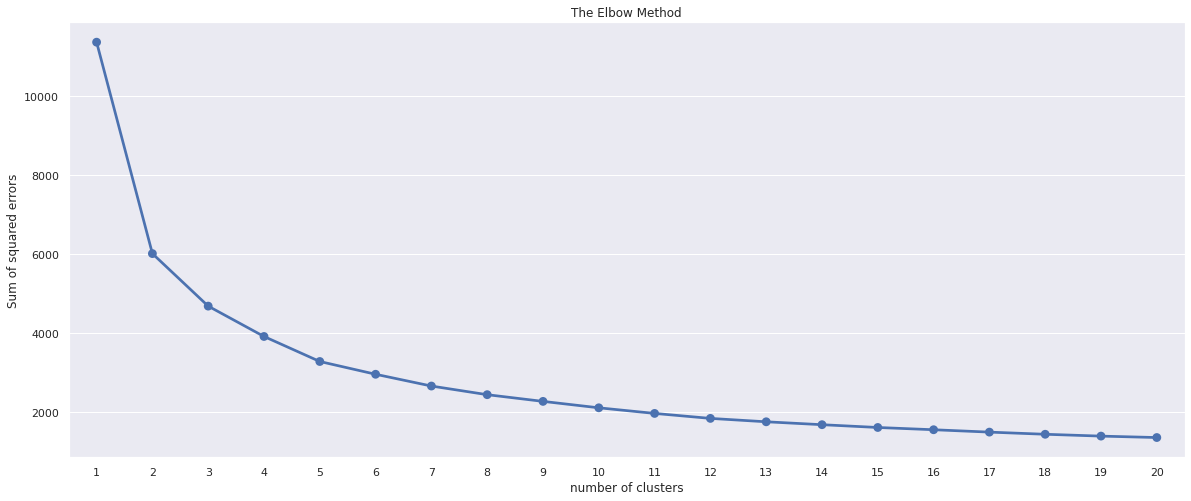

In [ ]:
# Elbow-curve/SSD
wcss = {}
# Fit KMeans and calculate SSE for each k
for k in range(1,21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=50)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(X)
    
    # Assign sum of squared distances to k element of dictionary
    wcss[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(20,8))
plt.title('The Elbow Method')
plt.xlabel('number of clusters'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [ ]:
# Using number of cluster as 2 for customer segmentation
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

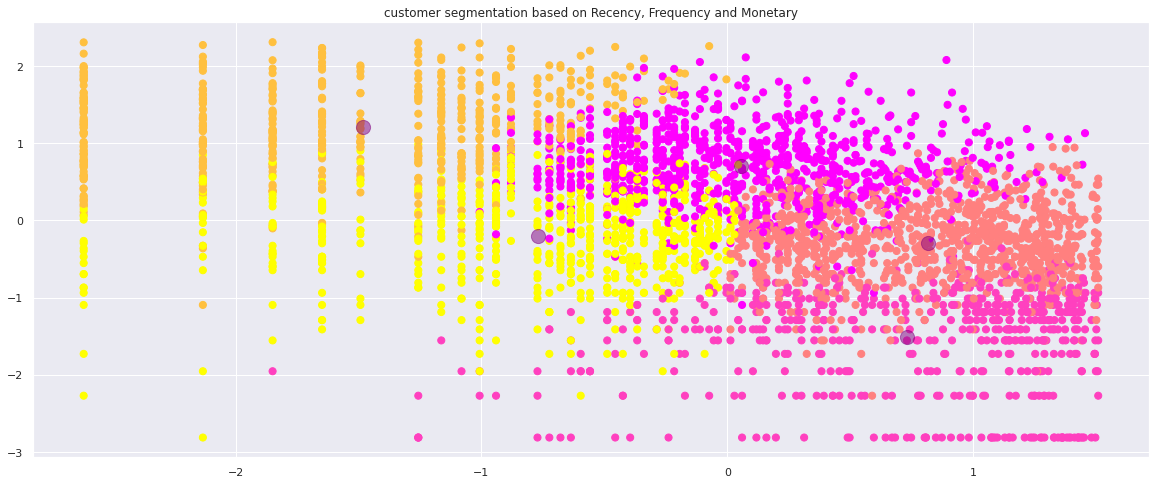

In [ ]:
# Plotting the cluster scatter plot
plt.figure(figsize=(20,8))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

In [ ]:
# Creating Cluster Number column
segmentation['ClusterNo'] = kmeans.labels_

In [ ]:
# Getting first 5 rows of segmentation
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo
1,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,3
3,12749.0,3,199,4090.88,444,12,1.098612,5.293305,8.316515,3
4,12820.0,3,59,942.34,433,10,1.098612,4.077537,6.848366,3
5,12821.0,214,6,92.72,111,3,5.365976,1.791759,4.529584,1
6,12822.0,70,46,948.88,233,8,4.248495,3.828641,6.855282,0


In [ ]:
segmentation['ClusterNo'].unique()

array([3, 1, 0, 2, 4], dtype=int32)

In [ ]:
figure = px.scatter_3d(segmentation,
                    color='ClusterNo',
                    x="Recency",
                    y="Frequency",
                    z="Monetary",            
                    category_orders = {"clusters": ["3", "1", "0", "2", "4"]}                    
                    )
figure.update_layout()
figure.show()

In [ ]:
# Value count how many customers are present in each cluster
segmentation['ClusterNo'].value_counts()

2    1037
0     940
4     652
1     598
3     563
Name: ClusterNo, dtype: int64

In [ ]:
# Merging segmenatation and main dataframe
merge_df = segmentation.merge(df,on='CustomerID')
merge_df.head()

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo,...,UnitPrice,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week,UK
0,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,3,...,2.55,United Kingdom,30.60,2010,12,5,15,38,Sun,1
1,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,3,...,2.55,United Kingdom,15.30,2010,12,5,15,38,Sun,1
2,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,3,...,1.69,United Kingdom,27.04,2010,12,5,15,38,Sun,1
3,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,3,...,1.65,United Kingdom,39.60,2010,12,5,15,38,Sun,1
4,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,3,...,5.45,United Kingdom,32.70,2010,12,5,15,38,Sun,1


## Cluster 0 Analysis

In [ ]:
# Getting rows with cluster 0
segmentation[segmentation['ClusterNo']==0]

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo
6,12822.0,70,46,948.88,233,8,4.248495,3.828641,6.855282,0
13,12830.0,37,38,6814.64,324,9,3.610918,3.637586,8.826829,0
18,12836.0,59,174,2610.36,244,10,4.077537,5.159055,7.867243,0
22,12840.0,143,113,2726.77,144,9,4.962845,4.727388,7.910873,0
24,12842.0,70,34,1118.99,223,7,4.248495,3.526361,7.020182,0
...,...,...,...,...,...,...,...,...,...,...
3844,18259.0,24,35,1962.30,324,9,3.178054,3.555348,7.581873,0
3845,18260.0,172,133,2628.35,144,9,5.147494,4.890349,7.874112,0
3848,18263.0,25,61,1213.16,333,9,3.218876,4.110874,7.100984,0
3849,18265.0,72,46,801.51,233,8,4.276666,3.828641,6.686497,0


In [ ]:
# reset index of merge dataframe
temp = merge_df.reset_index()

In [ ]:
# customer id of cluster 0
cust0 = list(temp[temp['ClusterNo']==0]['CustomerID'])

In [ ]:
# Cluster 0 info
cluster0 = merge_df[merge_df['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice','Amount_spent', 'Frequency', 'Recency'
         , 'Monetary']].mean()

Quantity          10.067296
UnitPrice          2.969246
Amount_spent      16.459513
Frequency        152.405992
Recency           57.477094
Monetary        1940.724870
dtype: float64

In [ ]:
cluster0.describe()

,CustomerID,Recency,Frequency,Monetary,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo,Quantity,UnitPrice,Amount_spent,Year,Month,Day,Hour,Minutes,UK
count,103246.000000,103246.000000,103246.000000,103246.000000,103246.000000,103246.000000,103246.000000,103246.000000,103246.0,103246.000000,103246.000000,103246.000000,103246.000000,103246.000000,103246.000000,103246.000000,103246.000000,103246.0
mean,15631.131192,57.477094,152.405992,1940.724870,9.703427,3.805844,4.849988,7.393600,0.0,10.067296,2.969246,16.459513,2010.947853,7.149391,15.051440,12.784360,30.321669,1.0
std,1498.830923,47.156825,97.013292,1292.429176,1.115218,0.674091,0.593759,0.586783,0.0,26.790442,10.780588,28.971975,0.222325,3.303388,8.407985,2.204291,17.142421,0.0
min,12822.000000,10.000000,9.000000,386.320000,7.000000,2.302585,2.197225,5.956666,0.0,1.000000,0.000000,0.000000,2010.000000,1.000000,1.000000,6.000000,0.000000,1.0
25%,14449.000000,28.000000,84.000000,1059.120000,9.000000,3.332205,4.430817,6.965194,0.0,2.000000,1.250000,4.950000,2011.000000,4.000000,8.000000,11.000000,16.000000,1.0
50%,15737.000000,42.000000,127.000000,1590.810000,10.000000,3.737670,4.844187,7.371999,0.0,5.000000,1.950000,11.800000,2011.000000,8.000000,14.000000,13.000000,31.000000,1.0
75%,16898.000000,70.000000,193.000000,2457.580000,11.000000,4.248495,5.262690,7.806929,0.0,12.000000,3.750000,17.700000,2011.000000,10.000000,22.000000,14.000000,45.000000,1.0
max,18287.000000,338.000000,544.000000,11581.800000,12.000000,5.823046,6.298949,9.357190,0.0,2160.000000,2500.000000,2500.000000,2011.000000,12.000000,31.000000,20.000000,59.000000,1.0


In [ ]:
# Top products brought by cluster 0 customers 
cluster0['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    620
REGENCY CAKESTAND 3 TIER              450
ASSORTED COLOUR BIRD ORNAMENT         439
PARTY BUNTING                         424
JUMBO BAG RED RETROSPOT               401
SET OF 3 CAKE TINS PANTRY DESIGN      355
NATURAL SLATE HEART CHALKBOARD        327
LUNCH BAG RED RETROSPOT               320
HEART OF WICKER SMALL                 313
SPOTTY BUNTING                        301
Name: Description, dtype: int64

In [ ]:
# Customer aggregation for rfm score of cluster 0
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

In [ ]:
# distribution of rfm score in cluster 0
cluster0_grouped['RFMScore'].value_counts()

10    264
9     258
8     190
11    165
7      58
12      5
Name: RFMScore, dtype: int64

In [ ]:
# buying pattern across different months in cluster 0
cluster0['Month'].value_counts()

10    15207
11    13474
9     11358
5      8262
8      7979
4      7598
6      7571
3      7187
7      7150
2      6385
1      5691
12     5384
Name: Month, dtype: int64

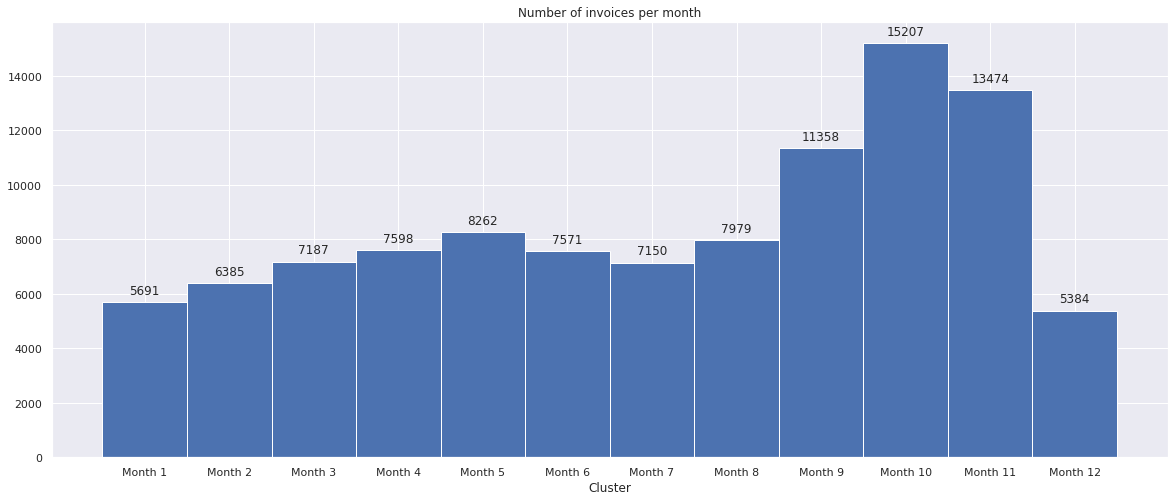

In [ ]:
# Plotting graph for buying pattern across different months in cluster 0
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [ ]:
# customers buying pattern in different year
temp['Year'] = cluster0[cluster0['Month']==12]['InvoiceDate'].map(lambda x: x.year)
temp['Year'].value_counts()

2010.0    5384
Name: Year, dtype: int64

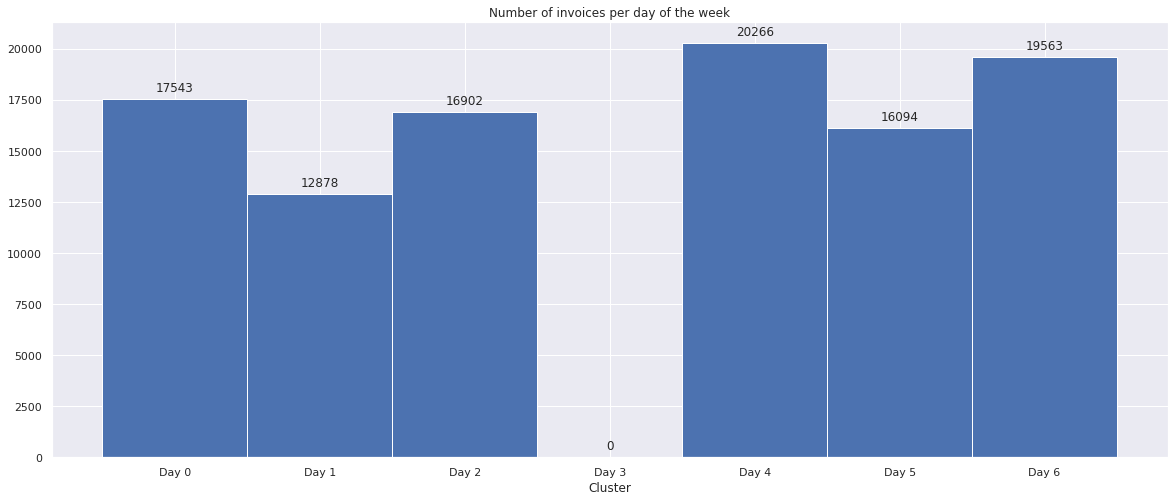

In [ ]:
# Plotting Graph for customers buying pattern in different year
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Day_of_week'], bins=7)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(0, 7)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

## Cluster 1 Analysis

In [ ]:
# Getting rows with cluster 1
segmentation[segmentation['ClusterNo']==1]

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo
5,12821.0,214,6,92.72,111,3,5.365976,1.791759,4.529584,1
14,12831.0,262,9,215.05,111,3,5.568345,2.197225,5.370871,1
19,12837.0,173,12,134.10,111,3,5.153292,2.484907,4.898586,1
36,12863.0,52,5,521.20,212,5,3.951244,1.609438,6.256134,1
37,12864.0,138,3,147.12,111,3,4.927254,1.098612,4.991249,1
...,...,...,...,...,...,...,...,...,...,...
3854,18274.0,30,11,175.92,311,5,3.401197,2.397895,5.170029,1
3856,18277.0,58,8,110.38,211,4,4.060443,2.079442,4.703929,1
3857,18278.0,73,9,173.90,211,4,4.290459,2.197225,5.158480,1
3858,18280.0,277,10,180.60,111,3,5.624018,2.302585,5.196285,1


In [ ]:
# reset index of merge dataframe
temp = merge_df.reset_index()

# customer id of cluster 1
cust1 = list(temp[temp['ClusterNo']==1]['CustomerID'])

# Cluster 1 info
cluster1 = merge_df[merge_df['CustomerID'].isin(cust1)]
cluster1[['Quantity', 'UnitPrice','Amount_spent', 'Frequency', 'Recency'
         , 'Monetary']].mean()

Quantity         20.303312
UnitPrice         4.465463
Amount_spent     26.381602
Frequency         9.398367
Recency         170.641107
Monetary        163.468512
dtype: float64

In [ ]:
cluster1.describe()

,CustomerID,Recency,Frequency,Monetary,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo,Quantity,UnitPrice,Amount_spent,Year,Month,Day,Hour,Minutes,UK
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.0,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.0
mean,15577.173094,170.641107,9.398367,163.468512,3.694646,4.877462,2.100299,4.969498,1.0,20.303312,4.465463,26.381602,2010.900862,6.855036,14.540154,12.715971,29.784483,1.0
std,1633.015293,101.211598,4.657560,105.385290,0.850125,0.821405,0.579224,0.504885,0.0,215.119741,33.750930,73.951737,0.298881,3.500668,8.801171,2.396976,17.760472,0.0
min,12821.000000,3.000000,1.000000,1.000000,3.000000,1.098612,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,2010.000000,1.000000,1.000000,8.000000,0.000000,1.0
25%,14073.000000,70.000000,6.000000,110.380000,3.000000,4.248495,1.791759,4.703929,1.0,2.000000,1.250000,8.850000,2011.000000,4.000000,6.000000,11.000000,13.750000,1.0
50%,15670.000000,173.000000,9.000000,148.800000,3.000000,5.153292,2.197225,5.002603,1.0,6.000000,2.080000,15.000000,2011.000000,7.000000,14.000000,13.000000,32.000000,1.0
75%,17030.000000,261.000000,12.000000,190.550000,4.000000,5.564520,2.484907,5.249915,1.0,12.000000,4.250000,20.800000,2011.000000,10.000000,22.000000,14.000000,45.000000,1.0
max,18281.000000,365.000000,29.000000,3096.000000,7.000000,5.899897,3.367296,8.037866,1.0,12540.000000,2033.100000,3096.000000,2011.000000,12.000000,31.000000,19.000000,59.000000,1.0


In [ ]:
# Top products brought by cluster 1 customers 
cluster1['Description'].value_counts()[:10]

REGENCY CAKESTAND 3 TIER              43
WHITE HANGING HEART T-LIGHT HOLDER    42
JUMBO BAG RED RETROSPOT               26
PARTY BUNTING                         25
ASSORTED COLOUR BIRD ORNAMENT         25
NATURAL SLATE HEART CHALKBOARD        24
HEART OF WICKER SMALL                 24
VICTORIAN GLASS HANGING T-LIGHT       24
BAKING SET 9 PIECE RETROSPOT          21
REX CASH+CARRY JUMBO SHOPPER          20
Name: Description, dtype: int64

In [ ]:
# Customer aggregation for rfm score of cluster 1
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster1_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)


# distribution of rfm score in cluster 1
cluster1_grouped['RFMScore'].value_counts()

10    264
9     258
8     190
11    165
7      58
12      5
Name: RFMScore, dtype: int64

In [ ]:
# buying pattern across different months in cluster 1
cluster1['Month'].value_counts()

10    618
12    450
3     409
6     408
5     389
9     377
11    354
4     335
2     325
1     284
8     243
7     216
Name: Month, dtype: int64

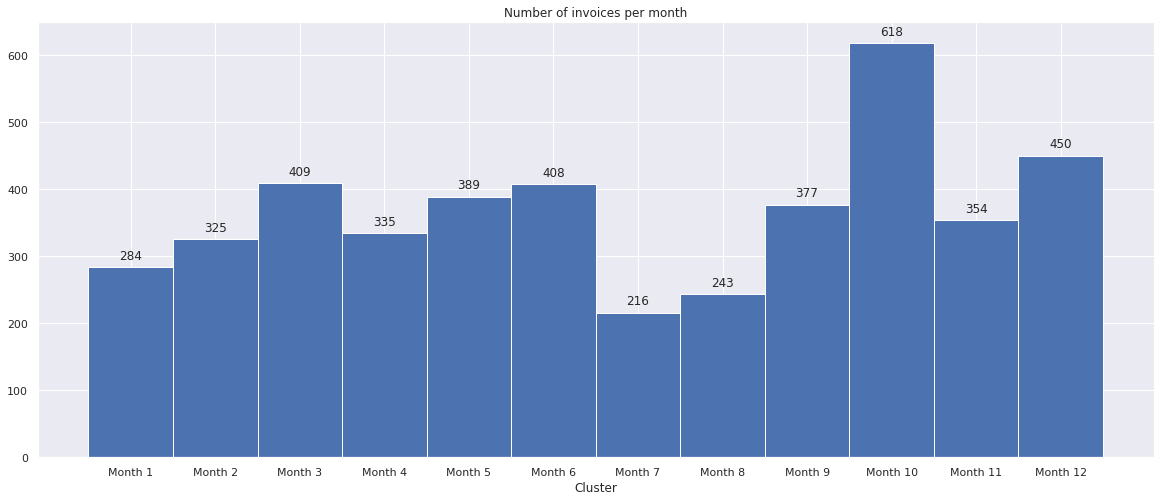

In [ ]:
# Plotting graph for buying pattern across different months in cluster 1
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster1['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [ ]:
# customers buying pattern in different year
temp['Year'] = cluster1[cluster1['Month']==12]['InvoiceDate'].map(lambda x: x.year)
temp['Year'].value_counts()

2010.0    437
2011.0     13
Name: Year, dtype: int64

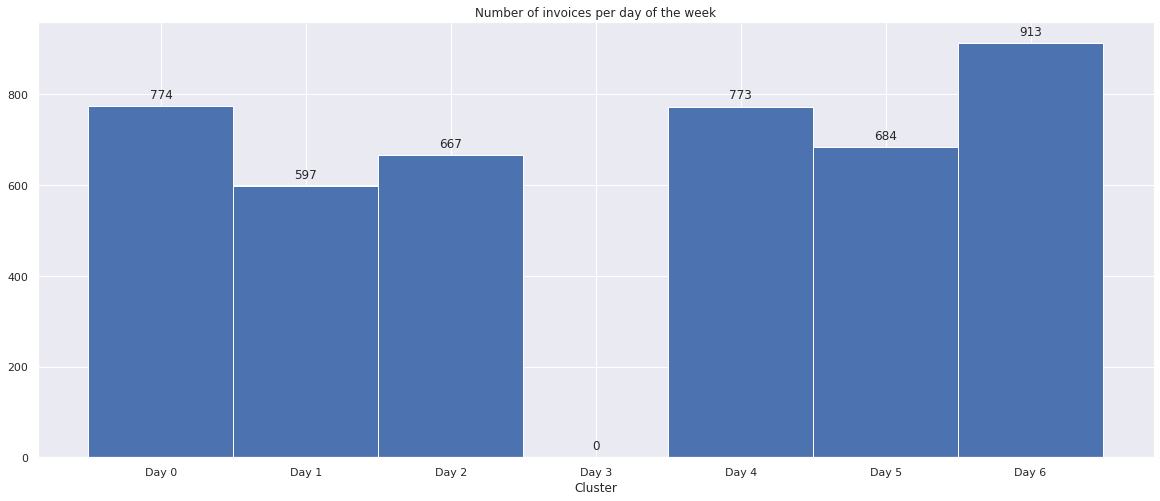

In [ ]:
# Plotting Graph for customers buying pattern in different year
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster1['Day_of_week'], bins=7)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(0, 7)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

## Conclusion

-  We have got 2 clusters by applying k means algorithim
-  So the customers got segmented into 2 clusters
- Online Retail Customer marketing team can now use different approaches to acquire the customers



### Cluster 0

Key figures:

- Frequency : 28.68
- Recency : 230
- Monetary : 3070
- RFM Score : 10.71

Top 10 Products

- WHITE HANGING HEART T-LIGHT HOLDER    339
- REGENCY CAKESTAND 3 TIER              268
- ASSORTED COLOUR BIRD ORNAMENT         235
- PARTY BUNTING                         229
- REX CASH+CARRY JUMBO SHOPPER          202
- NATURAL SLATE HEART CHALKBOARD        161
- BAKING SET 9 PIECE RETROSPOT          155
- HEART OF WICKER SMALL                 150
- SET OF 3 CAKE TINS PANTRY DESIGN      147
- HEART OF WICKER LARGE                 146

### Cluster 1 

Key figures:

- Frequency : 37.67

- Recency : 134.64

- Monetary : 447.40

- RFM Score : 5.90

Top 10 Products:
- WHITE HANGING HEART T-LIGHT HOLDER    344
- REGENCY CAKESTAND 3 TIER              271
- ASSORTED COLOUR BIRD ORNAMENT         239
- PARTY BUNTING                         232
- REX CASH+CARRY JUMBO SHOPPER          204
- NATURAL SLATE HEART CHALKBOARD        164
- BAKING SET 9 PIECE RETROSPOT          156
- HEART OF WICKER SMALL                 152
- HEART OF WICKER LARGE                 148
- SET OF 3 CAKE TINS PANTRY DESIGN      148